<a href="https://www.kaggle.com/code/manojs048/medical-expences?scriptVersionId=124755475" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predictions of Medical expenses: Regression models along with evalution metrics and plots for each model

# Columns

### age: age of primary beneficiary

### sex: insurance contractor gender, female, male

### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

### children: Number of children covered by health insurance / Number of dependents

### smoker: Smoking

### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

### charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/kaggle/input/medicalexpencesinsurance/expenses.csv', na_values=['@','#','$','!','&','^'])

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
print(' Unique values in Sex column are: ', df.sex.unique())
print(' Unique values in Children column are: ', df.children.unique())
print(' Unique values in Smoker column are: ', df.smoker.unique())
print(' Unique values in Region column are: ', df.region.unique())

 Unique values in Sex column are:  ['female' 'male']
 Unique values in Children column are:  [0 1 3 2 5 4]
 Unique values in Smoker column are:  ['yes' 'no']
 Unique values in Region column are:  ['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
print(' cardinality of Sex column is: ', df.sex.nunique())
print(' cardinality of Children column is: ', df.children.nunique())
print(' cardinality of Smoker column is: ', df.smoker.nunique())
print(' cardinality of Region column is: ', df.region.nunique())

 cardinality of Sex column is:  2
 cardinality of Children column is:  6
 cardinality of Smoker column is:  2
 cardinality of Region column is:  4


In [7]:
df.describe(include='all')
df.describe().style.background_gradient(cmap='Reds')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
for i in df.columns:
 print(i,'is',df[i].nunique())

age is 47
sex is 2
bmi is 548
children is 6
smoker is 2
region is 4
charges is 1337


In [9]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.value_counts('region')

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum().sum()

0

In [13]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

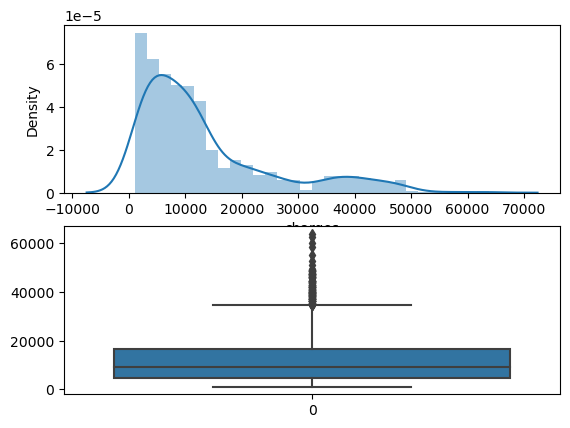

In [15]:
plot(df,'charges')

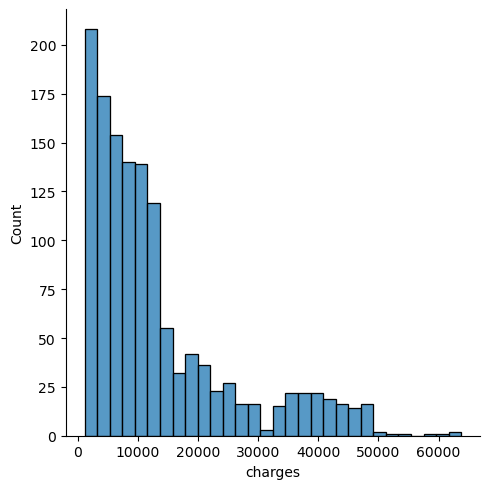

In [16]:
sns.displot(data = df.charges)
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

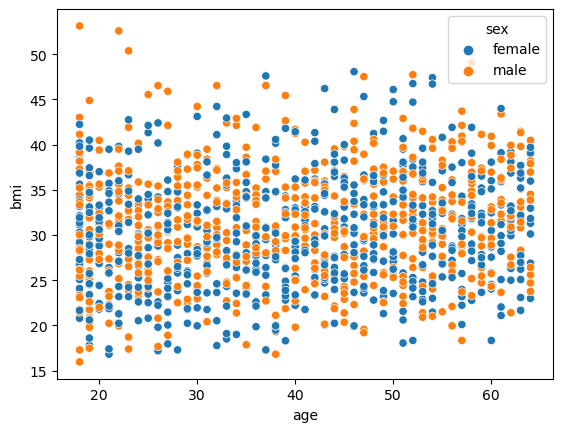

In [17]:
sns.scatterplot(x=df.age, y=df.bmi, hue = df.sex)

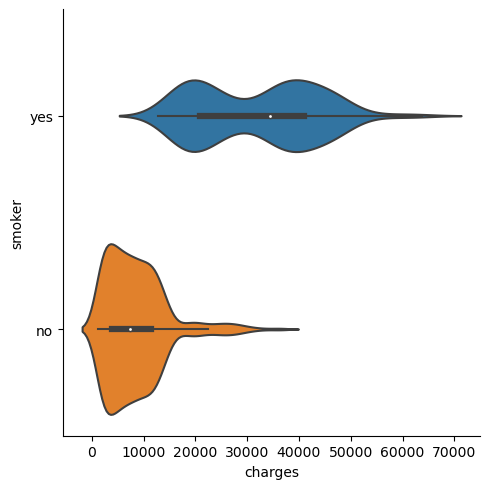

In [18]:
sns.catplot(data=df,x='charges',y='smoker',kind='violin')

In [19]:
df['charges']=np.where(df['charges']>=50300,df['charges'].median(),df['charges'])

In [20]:
df.shape

(1338, 7)

In [21]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['sex']=labelencoder.fit_transform(df['sex'])

In [23]:
df['region']=labelencoder.fit_transform(df['region'])
df['smoker']=labelencoder.fit_transform(df['smoker'])

In [24]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13017.655199
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,11671.674071
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9379.968850
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16209.325763
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,49577.662400


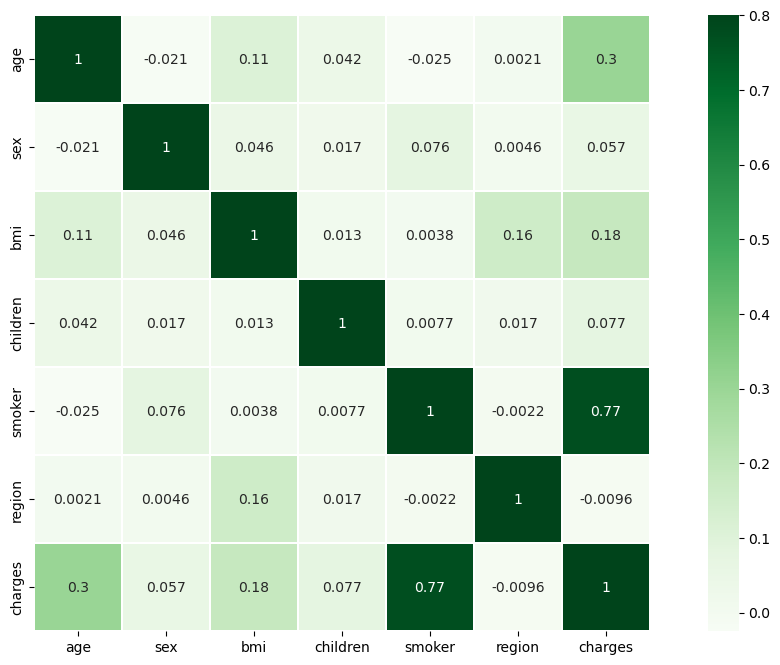

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Greens', vmax=.8, linewidths=0.01,square=True,annot=True,linecolor="white")
plt.show()

In [26]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [27]:
#train test split
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10, random_state=4)

In [28]:
#x = df.drop('charges', axis=1)
#y = df['charges']

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [30]:
df= pd.read_csv('/kaggle/input/medicalexpencesinsurance/expenses.csv', na_values=['@','#','$','!','&','^'])

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['sex']=labelencoder.fit_transform(df['sex'])
df['region']=labelencoder.fit_transform(df['region'])
df['smoker']=labelencoder.fit_transform(df['smoker'])

In [32]:
# Split the dataset into features and target variable
X = df.drop(columns=['charges'])
y = df['charges']


In [33]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In this example, I've used five different models: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, and Random Forest Regression. For each model, I've printed the R^2 score, mean squared error, and mean absolute error, and plotted a scatter plot of the actual vs. predicted values. For Decision Tree and Random Forest Regression, I've also printed the classification report, since these models can be used for classification as well as regression.

Model: Linear Regression
R^2: 0.7833463107364537
Mean Squared Error: 33635210.431178436
Mean Absolute Error: 4186.5088983664355


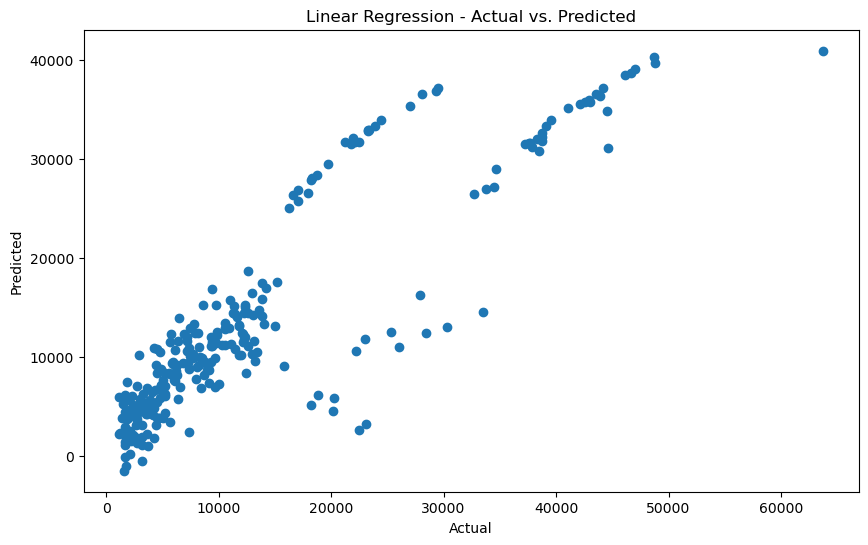

Model: Ridge Regression
R^2: 0.7833037457661384
Mean Squared Error: 33641818.58882587
Mean Absolute Error: 4187.971685427724


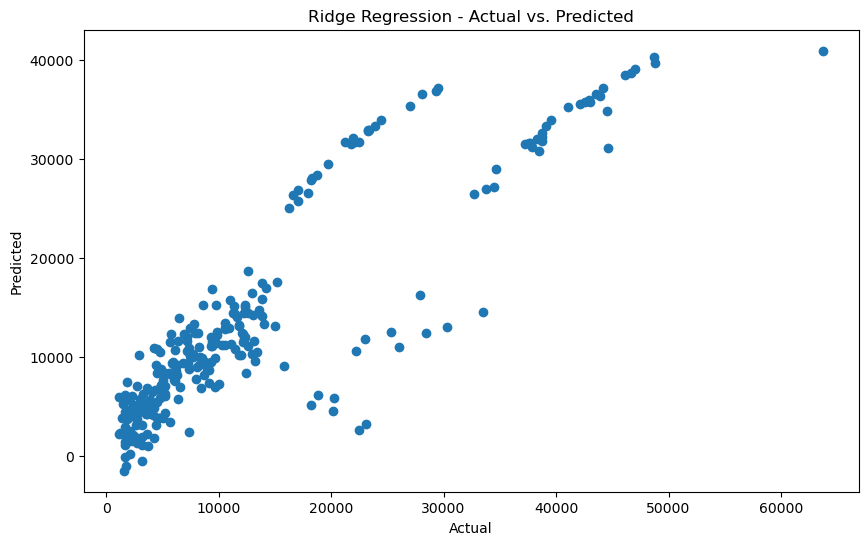

Model: Lasso Regression
R^2: 0.7833293535279202
Mean Squared Error: 33637843.01629289
Mean Absolute Error: 4186.623542226471


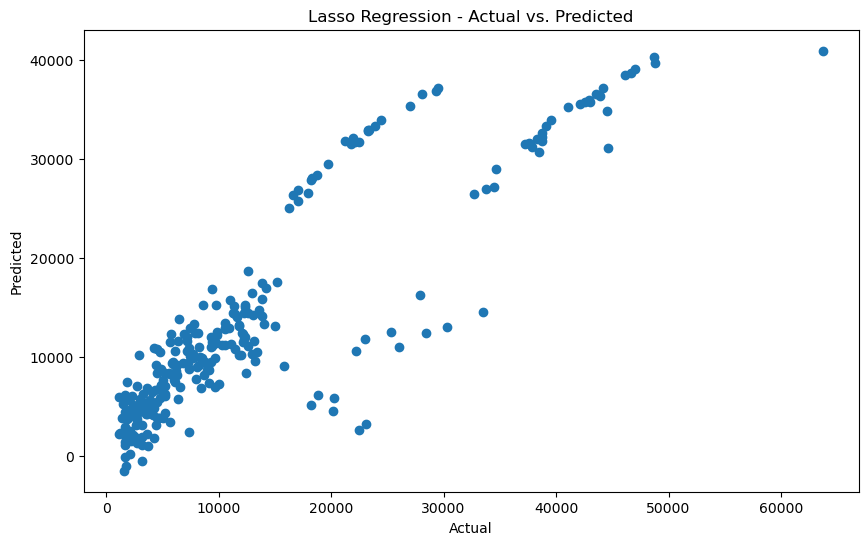

Model: Decision Tree Regression
R^2: 0.8309769670027721
Mean Squared Error: 26240611.465711795
Mean Absolute Error: 2919.196670680585


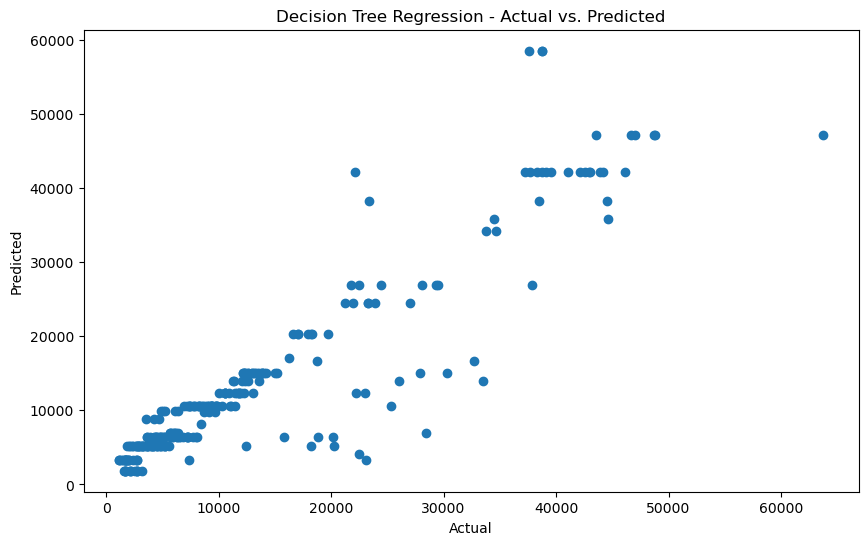

Model: Random Forest Regression
R^2: 0.8752000575102259
Mean Squared Error: 19375032.761783715
Mean Absolute Error: 2519.0674761877103


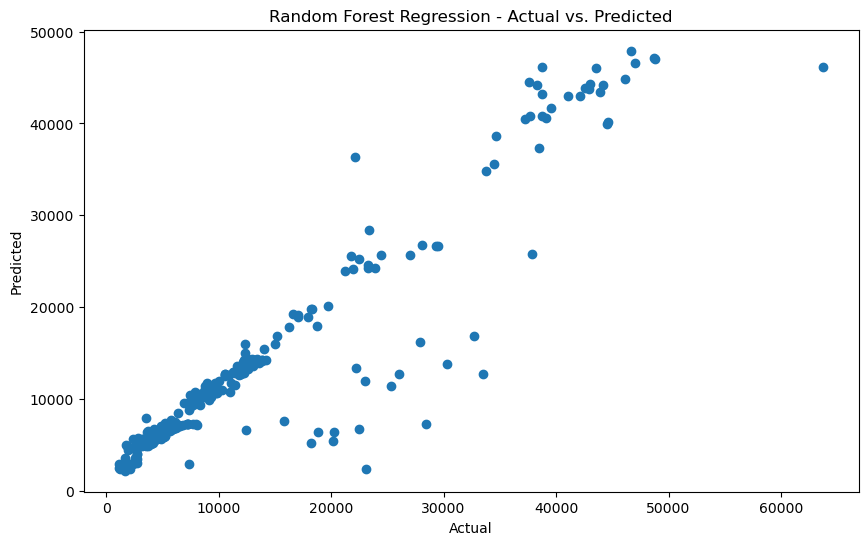

In [35]:
from sklearn.metrics import classification_report
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, max_depth=5)
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print('Model:', name)
    print('R^2:', r2)
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.title(f'{name} - Actual vs. Predicted')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
    